In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df['placement'].unique()

array([1, 0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='placement', ylabel='cgpa'>

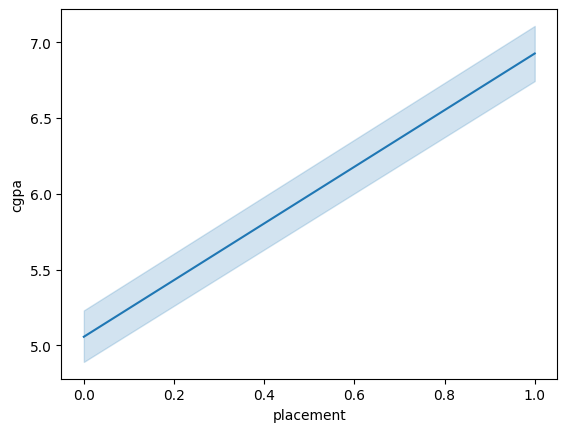

In [8]:
sns.lineplot(x = 'placement', y = 'cgpa',data = df)

#### conclusion 
- when cgpa increase placement chance is also increase

<Axes: xlabel='iq', ylabel='cgpa'>

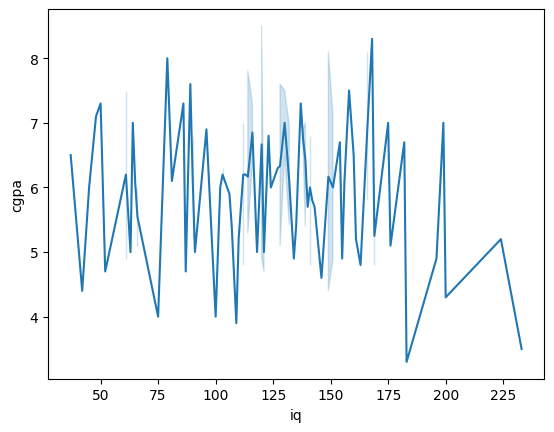

In [9]:
sns.lineplot(x = 'iq',y = 'cgpa', data = df)

In [10]:
df.corr()

,Unnamed: 0,cgpa,iq,placement
Unnamed: 0,1.000000,0.047478,-0.019080,0.144807
cgpa,0.047478,1.000000,-0.098791,0.821688
iq,-0.019080,-0.098791,1.000000,-0.083031
placement,0.144807,0.821688,-0.083031,1.000000


<Axes: >

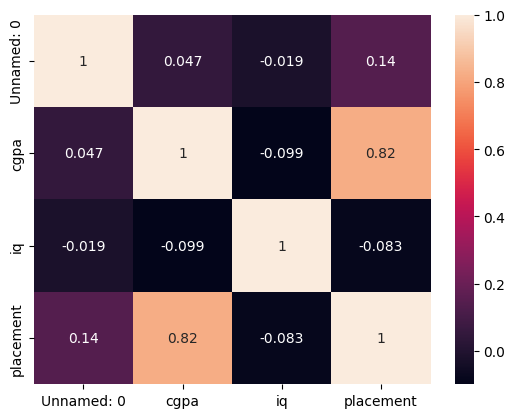

In [11]:
sns.heatmap(df.corr(),annot=True)

#### conclusion 
- I think iq is not important feature

In [12]:
df[df['iq']>=200] # we seen 3 outliers but ignore it

,Unnamed: 0,cgpa,iq,placement
16,16,5.2,224.0,0
50,50,3.5,233.0,0
95,95,4.3,200.0,0


<Axes: xlabel='placement', ylabel='cgpa'>

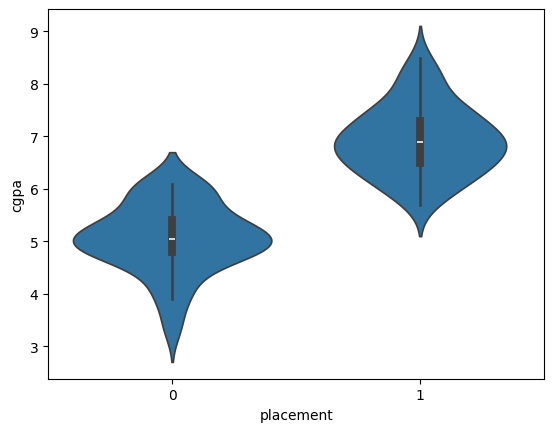

In [13]:
sns.violinplot(x = 'placement', y = 'cgpa', data = df)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# df['placement'] = df['placement'].map({'Yes': 1, 'No': 0}) # use map(...) not map[...] to convert categorical values to numbers

In [16]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [17]:
X = df[['cgpa','iq']]
y = df['placement']

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y.unique()

array([1, 0])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1)

In [21]:
X_train

,cgpa,iq
86,5.1,128.0
95,4.3,200.0
69,8.5,120.0
50,3.5,233.0
3,7.4,132.0
...,...,...
71,6.1,132.0
48,6.6,138.0
42,7.6,89.0
16,5.2,224.0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler() # StandardScaler rescales features to mean=0 and std=1 so all features contribute equally to the model.

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train

array([[-8.39236313e-01,  1.22205992e-01],
       [-1.54431233e+00,  1.88589158e+00],
       [ 2.15733675e+00, -7.37590733e-02],
       [-2.24938834e+00,  2.69424748e+00],
       [ 1.18785723e+00,  2.20188525e-01],
       [ 8.35319224e-01, -1.44551453e+00],
       [ 1.27599173e+00,  8.57074989e-01],
       [ 1.09972273e+00, -9.06610603e-01],
       [-1.19177432e+00, -8.82114969e-01],
       [ 2.18377710e-01,  1.22205992e-01],
       [-1.45617783e+00, -1.98441846e+00],
       [ 1.71666424e+00, -1.07808004e+00],
       [-7.51101811e-01, -3.18715405e-01],
       [-1.01550532e+00,  1.78790905e+00],
       [-1.01550532e+00,  2.69179792e-01],
       [ 9.23453726e-01, -1.83744466e+00],
       [ 9.23453726e-01,  6.85605556e-01],
       [-1.01550532e+00, -1.51900143e+00],
       [ 6.59050220e-01, -2.69724139e-01],
       [ 1.80479875e+00,  1.05304005e+00],
       [-4.60257955e-02, -1.39652327e+00],
       [-5.74832807e-01, -3.92202305e-01],
       [-1.10363982e+00,  1.12652695e+00],
       [ 1.

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [27]:
y_train

86    0
95    0
69    1
50    0
3     1
     ..
71    1
48    1
42    1
16    0
78    0
Name: placement, Length: 90, dtype: int64

In [39]:
clf.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [29]:
y_pred = model.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [30]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [40]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(r2)
print(mse)
print(acc)

-0.25
0.3
0.7


In [32]:
# -0.8749999999999993 model can not train better from dataset

In [35]:
# keep numpy compatible with tensorflow
!pip install numpy==1.26.4 --force-reinstall

# install compatible mlxtend version
!pip install mlxtend==0.23.1

  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
mlxtend 0.24.0 requires numpy>=2.3.5, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.4 MB/s  0:00:01 eta 0:00:01
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.24.0
    Uninstalling mlxtend-0.24.0:
      Successfully uninstalled mlxtend-0.24.0


<Axes: >

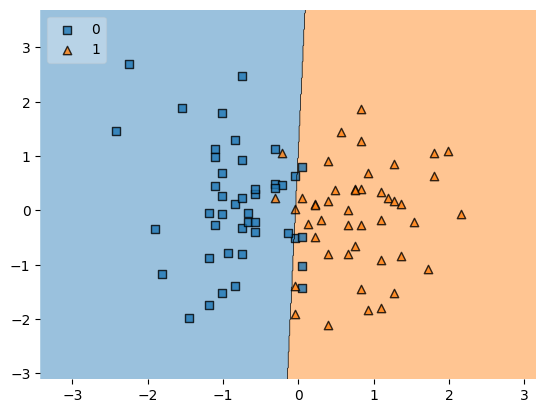

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [42]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))